# 2. Diamonds 데이터분석 캡스톤

In [1]:
origin = load_data('diamonds')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

print("\n===== 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/kaggle/diamonds.xlsx
[desc] 다이아몬드를 커팅, 색상, 투명도, 가격 및 기타 속성 조사한 데이터 셋 (출처: https://www.kaggle.com/datasets/shivam2503/diamonds)

field    description
-------  -------------------------------------------------------------------
price    다이아몬드 가격 (USD, $326 ~ $18,823)
carat    중량 (0.2~5.01)
cut      컷 품질 (Fair, Good, Very Good, Premium, Ideal)
color    색상 등급 - J (worst) to D (best)
clarity  투명도 등급 (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x        길이 mm (0~10.74)
y        너비 mm (0--58.9)
z        두께 mm (0--31.8)
depth    비율 정보 = z / mean(x, y) = 2 * z / (x + y) (43--79)
table    다이아몬드의 가장 넓은 지점에 비해 상단(테이블)의 너비 (43--95)


===== 데이터 크기 확인 =====
데이터셋 크기: (53940, 10)
열 갯수: 10
행 갯수: 53940

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940

,price,carat,cut,color,clarity,x,y,z,depth,table
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0


## 미션1.

### 결측치 여부

In [2]:
df = origin.copy()

df.isna().sum()

price      0
carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
depth      0
table      0
dtype: int64

> 결측치 없음

### 이상치 여부

이상치는 연속형 데이터에서 보자

#### 유난히 튀는 값

In [3]:
# 명목형 변수 제거
nominal = ['cut', 'color', 'clarity']
df2 = df.drop(nominal, axis=1)
df2

,price,carat,x,y,z,depth,table
0,326,0.23,3.95,3.98,2.43,61.5,55.0
1,326,0.21,3.89,3.84,2.31,59.8,61.0
2,327,0.23,4.05,4.07,2.31,56.9,65.0
3,334,0.29,4.20,4.23,2.63,62.4,58.0
4,335,0.31,4.34,4.35,2.75,63.3,58.0
...,...,...,...,...,...,...,...
53935,2757,0.72,5.75,5.76,3.50,60.8,57.0
53936,2757,0.72,5.69,5.75,3.61,63.1,55.0
53937,2757,0.70,5.66,5.68,3.56,62.8,60.0
53938,2757,0.86,6.15,6.12,3.74,61.0,58.0


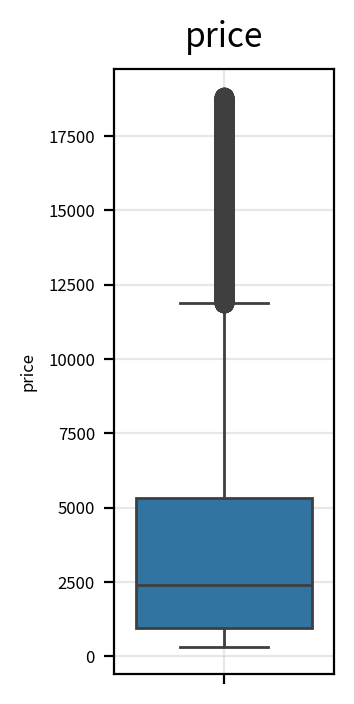

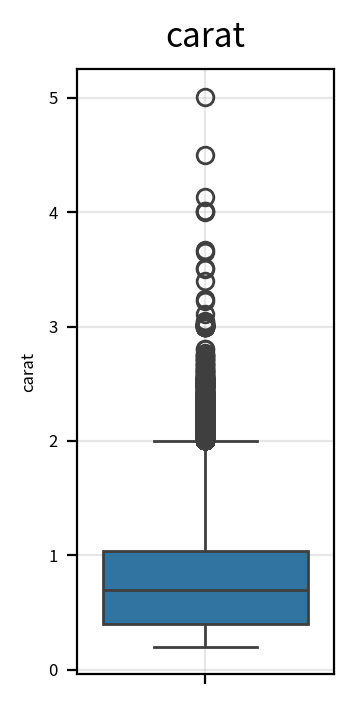

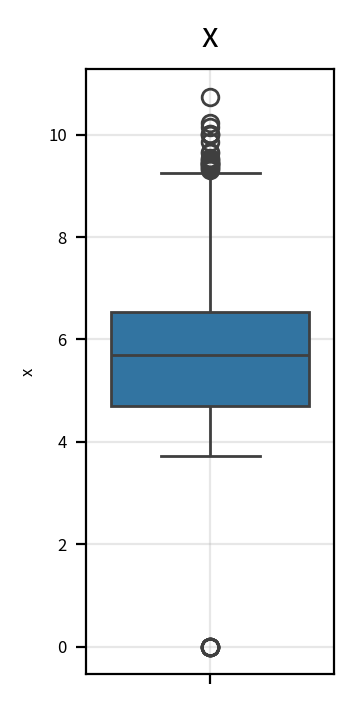

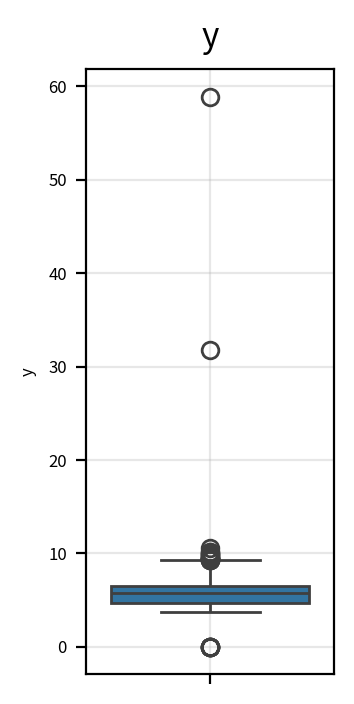

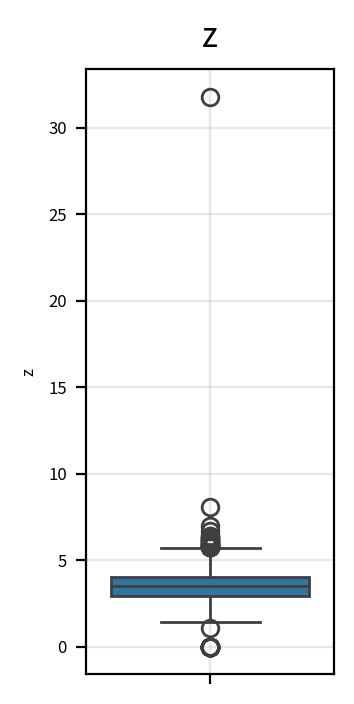

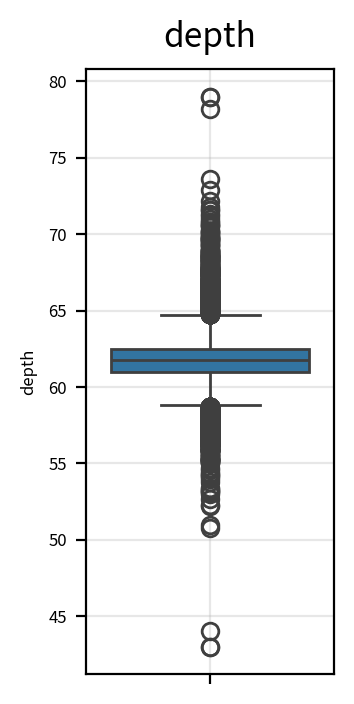

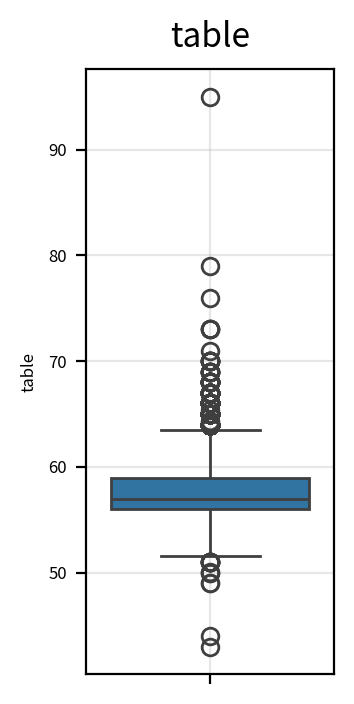

In [4]:
# 연속형 변수가 7개로 홀수여서 서브플롯 하기엔 애매쓰
# -> boxplot 반복문 돌리자

for item in df2.columns:
    # 1) 그래프 초기화
    width_px = 350         # 그래프 가로 크기
    height_px = 700        # 그래프 세로 크기
    rows = 1                # 그래프 행 수 ≠ 1
    cols = 1                # 그래프 열 수 ≠ 1
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

    # 2) 그래프 그리기
    sb.boxplot(data=df2, y=item)

    # 3) 그래프 꾸미기
    ax.set_title(item, pad = 8, fontsize = 12)
    ax.grid(True, alpha=0.3)                # 배경, 격자 표시/숨김

    # 4) 출력
    plt.tight_layout()                          # 여백 제거
    plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

> 1. 모든 변수에서 튀는 값들이 관찰 되었다.
>
> 2. 길이 단위를 쓰는 변수 x, y, z에서 말이 안되는 값(0)의 존재도 시각화로 확인되는데
> 
> x, y, z 중 하나라도 0을 가지는 다이아몬드 데이터에서 `종속변수인 price`랑 `중량 단위를 쓰는 변수 carat`에 값이 있는지 확인할 필요가 있다.
>  
> 만약 price랑 caratrk 0이 아닌 값을 가짐이 보여진다면 길이값 0도 말이 안됨이 반증이 되기 떄문이다. 

#### 말이 안되는 값(ex. x, y, z=0)

In [5]:
# x, y, z의 곱 변수 `vol(부피)`을 파생시킨 후
# 이 변수(vol)의 값이 0이면 "적어도" 세 변수 x, y, z 중 하나는 0이라는 것이니
# 이를 이용해서 vol=0인 데이터의 price랑 carat 확인하면 됨

df2['vol'] = df2['x'] * df2['y'] * df2['z']
# df2

zero_len = df2.query("vol == 0")
print(len(zero_len))
zero_len

20


,price,carat,x,y,z,depth,table,vol
2207,3142,1.00,6.55,6.48,0.0,59.1,59.0,0.0
2314,3167,1.01,6.66,6.60,0.0,58.1,59.0,0.0
4791,3696,1.10,6.50,6.47,0.0,63.0,59.0,0.0
5471,3837,1.01,6.50,6.47,0.0,59.2,58.0,0.0
10167,4731,1.50,7.15,7.04,0.0,64.0,61.0,0.0
11182,4954,1.07,0.00,6.62,0.0,61.6,56.0,0.0
11963,5139,1.00,0.00,0.00,0.0,63.3,53.0,0.0
13601,5564,1.15,6.88,6.83,0.0,59.2,56.0,0.0
15951,6381,1.14,0.00,0.00,0.0,57.5,67.0,0.0
24394,12631,2.18,8.49,8.45,0.0,59.4,61.0,0.0


> 부피(vol)가 0인 데이터는 총 20개이고, 이들도 price랑 carat값을 가지고 있음이 확인 되었다
>
> 즉, x, y, z 에서 0이 나온다는건 말이 안되는 값들인거고
>
> 이 말이 되지 않는 값과 유난히 튀는 값들을 가지는 변수들의 `데이터 전처리`는 `'≤ outline_min', 'outline_max ≤' 범위의 값들을 다 q1, q3로 몰거다.`

In [6]:
# 각 연속형 변수들의 `상한극단치경계`랑 `하한극단치경계` 찾기:
# df2.head()
for line in df2.columns:
    q1 = df2[line].quantile(0.25)
    q3 = df2[line].quantile(0.75)
    iqr = q3 - q1
    outline_min = q1 - iqr * 1.5
    outline_max = q3 + iqr * 1.5

    print(f"========= {line} =========")
    print(f"하한 극단치 경계:", outline_min)
    print(f"상한 극단치 경계:", outline_max)
    print(f"상한 극단치 경계를 벗어난 데이터 수:",len(df2[outline_max < df2[line]]))

    df2.loc[df2[line] < outline_min, line] = outline_min
    df2.loc[df2[line] > outline_max, line] = outline_max

df2.drop('vol', axis=1, inplace=True)
df2.head()

========= price =========
하한 극단치 경계: -5611.375
상한 극단치 경계: 11885.625
상한 극단치 경계를 벗어난 데이터 수: 3540
========= carat =========
하한 극단치 경계: -0.5599999999999999
상한 극단치 경계: 2.0
상한 극단치 경계를 벗어난 데이터 수: 1889
========= x =========
하한 극단치 경계: 1.9649999999999999
상한 극단치 경계: 9.285
상한 극단치 경계를 벗어난 데이터 수: 24
========= y =========
하한 극단치 경계: 1.9899999999999993
상한 극단치 경계: 9.27
상한 극단치 경계를 벗어난 데이터 수: 22
========= z =========
하한 극단치 경계: 1.2150000000000003
상한 극단치 경계: 5.734999999999999
상한 극단치 경계를 벗어난 데이터 수: 28
========= depth =========
하한 극단치 경계: 58.75
상한 극단치 경계: 64.75
상한 극단치 경계를 벗어난 데이터 수: 1039
========= table =========
하한 극단치 경계: 51.5
상한 극단치 경계: 63.5
상한 극단치 경계를 벗어난 데이터 수: 589
========= vol =========
하한 극단치 경계: -93.42160075000001
상한 극단치 경계: 329.40088125
상한 극단치 경계를 벗어난 데이터 수: 1320


C:\Users\itwill\AppData\Local\Temp\ipykernel_20816\2645525509.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-5611.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2[line] < outline_min, line] = outline_min


,price,carat,x,y,z,depth,table
0,326.0,0.23,3.95,3.98,2.43,61.50,55.0
1,326.0,0.21,3.89,3.84,2.31,59.80,61.0
2,327.0,0.23,4.05,4.07,2.31,58.75,63.5
3,334.0,0.29,4.20,4.23,2.63,62.40,58.0
4,335.0,0.31,4.34,4.35,2.75,63.30,58.0


### 명목형 변수: 변수 당 범주, 데이터 몰빵여부

In [7]:
# 변수 당 범주 갯수:
df3 = df.describe(include='object')
display(df3)

# 데이터 몰빵여부: 범주 별 비율로:
nominal = ['cut', 'color', 'clarity']
for c in nominal:
    print("====", c, "====")
    print(df[c].value_counts(normalize=True).round(3))

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


==== cut ====
cut
Ideal        0.400
Premium      0.256
Very Good    0.224
Good         0.091
Fair         0.030
Name: proportion, dtype: float64
==== color ====
color
G    0.209
E    0.182
F    0.177
H    0.154
D    0.126
I    0.101
J    0.052
Name: proportion, dtype: float64
==== clarity ====
clarity
SI1     0.242
VS2     0.227
SI2     0.170
VS1     0.151
VVS2    0.094
VVS1    0.068
IF      0.033
I1      0.014
Name: proportion, dtype: float64


> `cut` 변수의 `ideal` 범주가 데이터 몰빵이 되있다 (전체 데이터 중 40%)

## 미션2. 가격 데이터분포 탐색

분포특성: 고르게?/특정구간 몰림? -> 정규성 확인, 로그변환 필요유무 확인

### price랑 carat 데이터 분포 확인

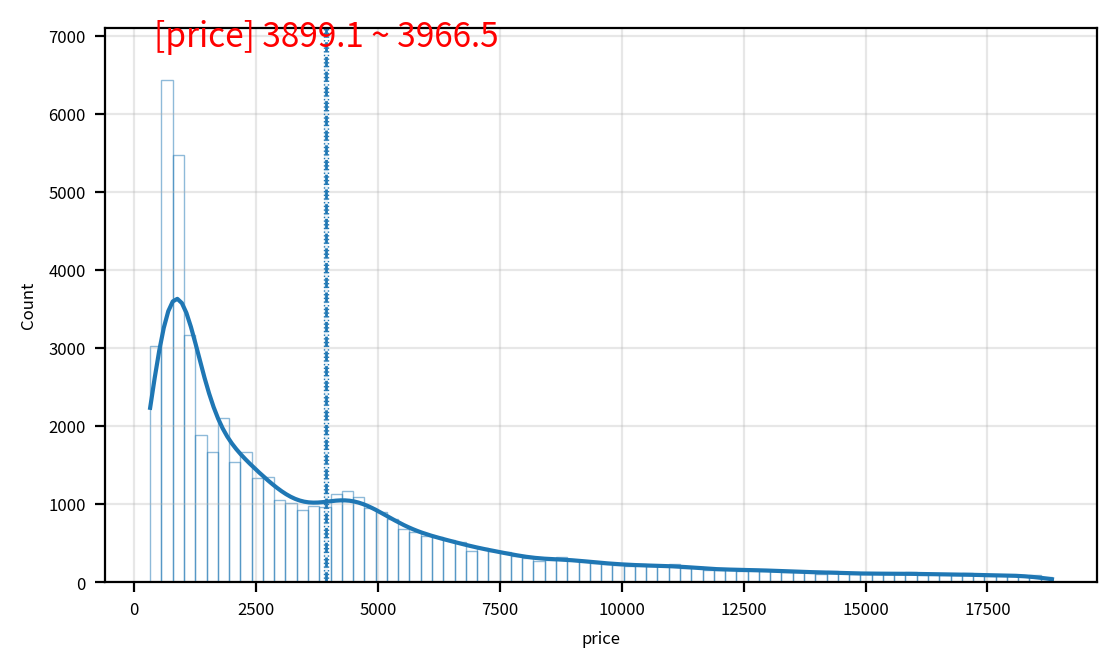

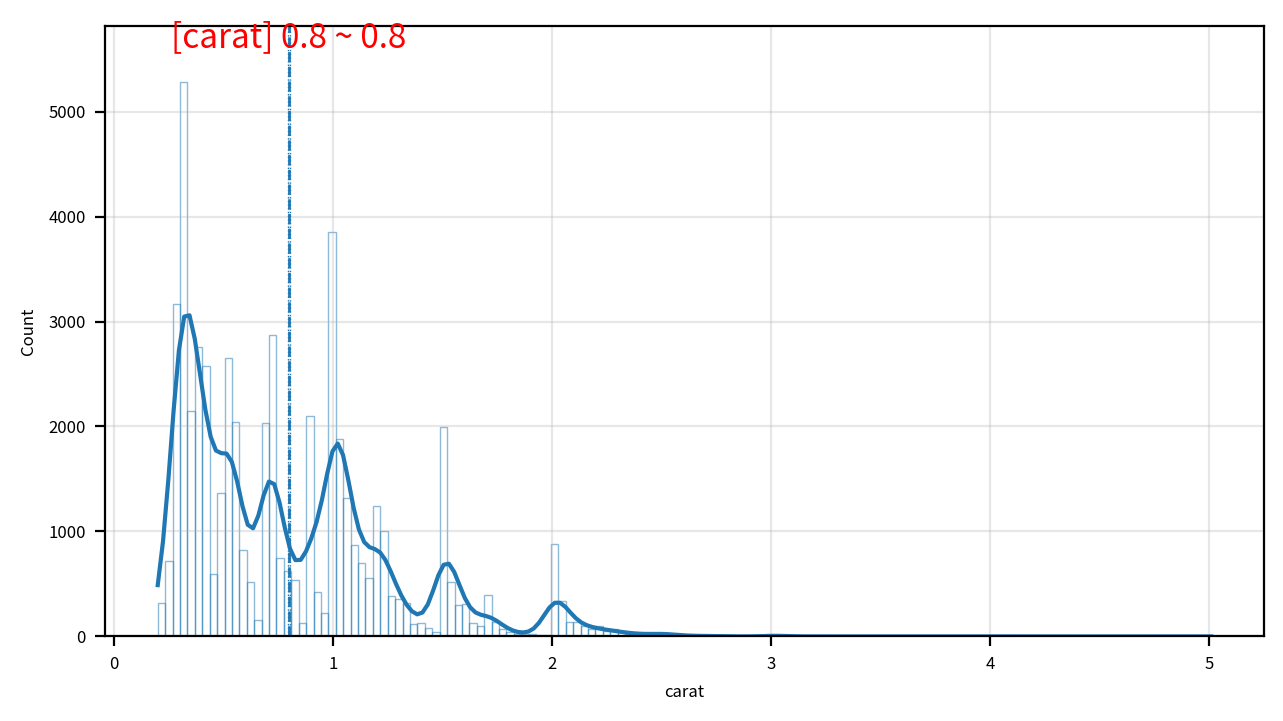

In [8]:
data = df[['price', 'carat']]  # 확인할 데이터 (컬럼단위)

for item in data.columns:
    # 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
    width_px = 1280             # 그래프 가로 크기
    height_px = 720             # 그래프 세로 크기
    rows = 1                    # 그래프 행 수
    cols = 1                    # 그래프 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

    # 2) KDE plot 그리기:
    sb.histplot(data=data, x=item, kde=True, fill=False, alpha=0.5)

    # 2-1) 신뢰구간용 기본변수:
    max = data[item].max()                        # 최대값
    dof = len(data[item]) - 1                     # 자유도
    clevel = 0.95                           # 신뢰수준
    sp_mean = data[item].mean()                   # 표본평균
    sp_std = data[item].std() # default: ddof=1   # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[item])) # 표본표준오차

    # 2-2) 신뢰구간 x값:
    cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

    ax.axvline(cmin, linestyle=":", linewidth=0.5) # cmin 경계선
    ax.axvline(cmax, linestyle=":", linewidth=0.5) # cmax 경계선

    # 2-3) 신뢰구간 y값:
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)

    # 2-4) 평균선 표시:
    ax.axvline(sp_mean, linestyle="--", linewidth=1)

    # 2-5) 텍스트 그리기 (statAnnotator 기능):
    ax.text(x = cmin + (cmax-cmin)/2,
            y=ymax,
            s="[%s] %0.1f ~ %0.1f" % (item, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size": 12, "color": "red"})

    # 3) 그래프 꾸미기: 
    ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

### 이 상태로 회귀분석 돌려도 괜찮은지 시각화로 함 확인 ㄱㄱ

- 독립변수: carat - 연속형
- 종속변수: price - 연속형
- 수업 시간에 배운 연속형 변수 간 회귀분석: 선형 회귀 분석
  - -> 가설: if `산점도 그래프`로 확인한 두 변수 간 관계가 선형이 아니라면 `로그변환`이 필요할 것이다.

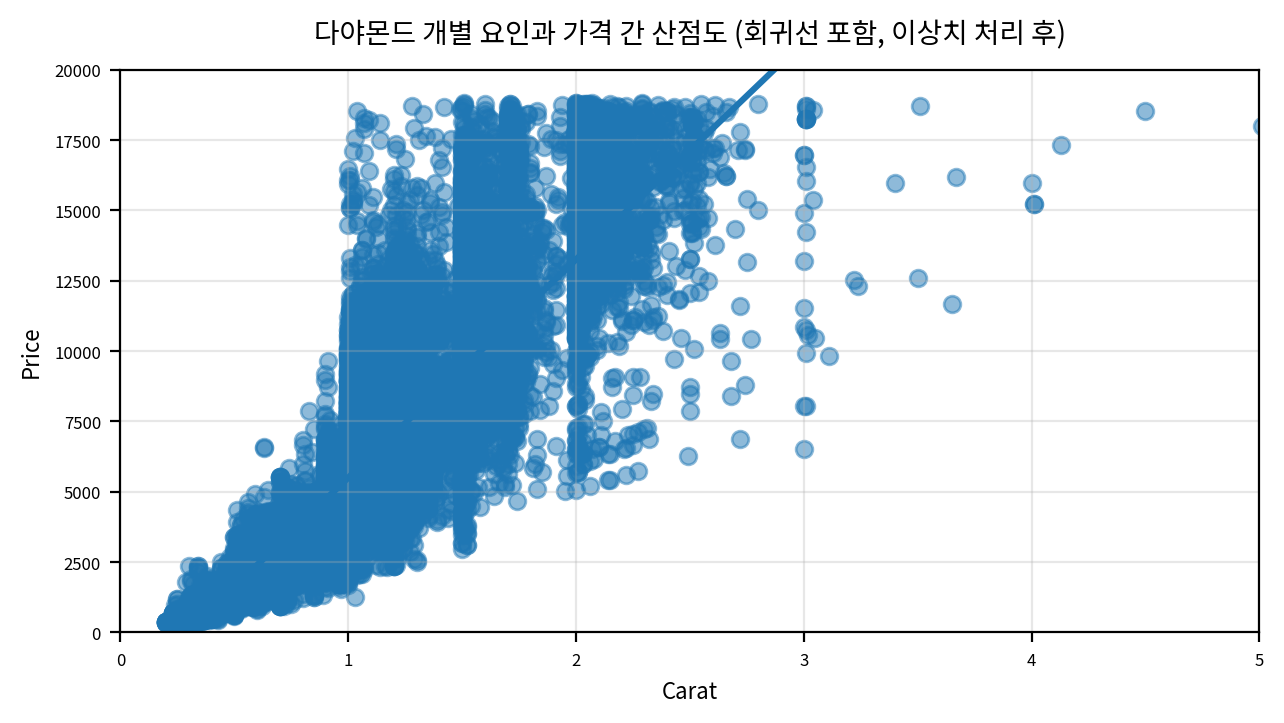

In [9]:
data = df[['price', 'carat']]  # 확인할 데이터 (컬럼단위)

# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 산점도 그래프(Reg Plot) 그리기 (회귀선 포함)
    # regplot()은 hue 파라미터를 지원 안한다 ㅠ
sb.regplot(data = data, x = 'carat', y = 'price',
        scatter_kws = {'alpha': 0.5})

# 3) 그래프 꾸미기: 
ax.set_title('다야몬드 개별 요인과 가격 간 산점도 (회귀선 포함, 이상치 처리 후)', fontsize=10, pad=10)
ax.set_xlabel('Carat', fontsize=8)
ax.set_ylabel('Price', fontsize=8)
ax.set_xlim([0, 5])
ax.set_ylim([0, 20000])
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

> 1. 개별 시각화를 통해서 알 수 있는 두 변수의 데이터분포에서의 
> 
> - 공통점:
>   - 두 변수 다 데이터가 고르게 분포해 있지 않다 (정규성 위반)
>   - 제일 큰 peak이 분포 초반에 나왔다가 변수 값이 커질수록 데이터 분포가 점진적으로 감소한다 
>   - 데이터가 정규성을 만족하지 못하므로 정규성 민감도를 줄이기 위해 `로그변환` 방법 등이 필요해보인다. 
> - 차이점:
>   - 두드러지는 peak의 갯수가 변수 `carat`에서는 여러번 나왔지만 `price` 에서는 1번 밖에 관찰이 되지 않는다
>   - 즉, price 데이터는 특정 구간에 몰빵되어 있다. 
>
> 2. 관계 시각화(Reg plot)를 통해 알 수 있는 사실:
> - 두 연속형 변수 간 관계는 `선형 관계라기 보다는 지수배로 커지는 관계` 같아 보임
> - → `로그변환`을 통해 선형성 확보가 필요해 보임

## 미션3. 로그변환

### `price`, `carat`의 로그변환 전후 데이터 분포 비교

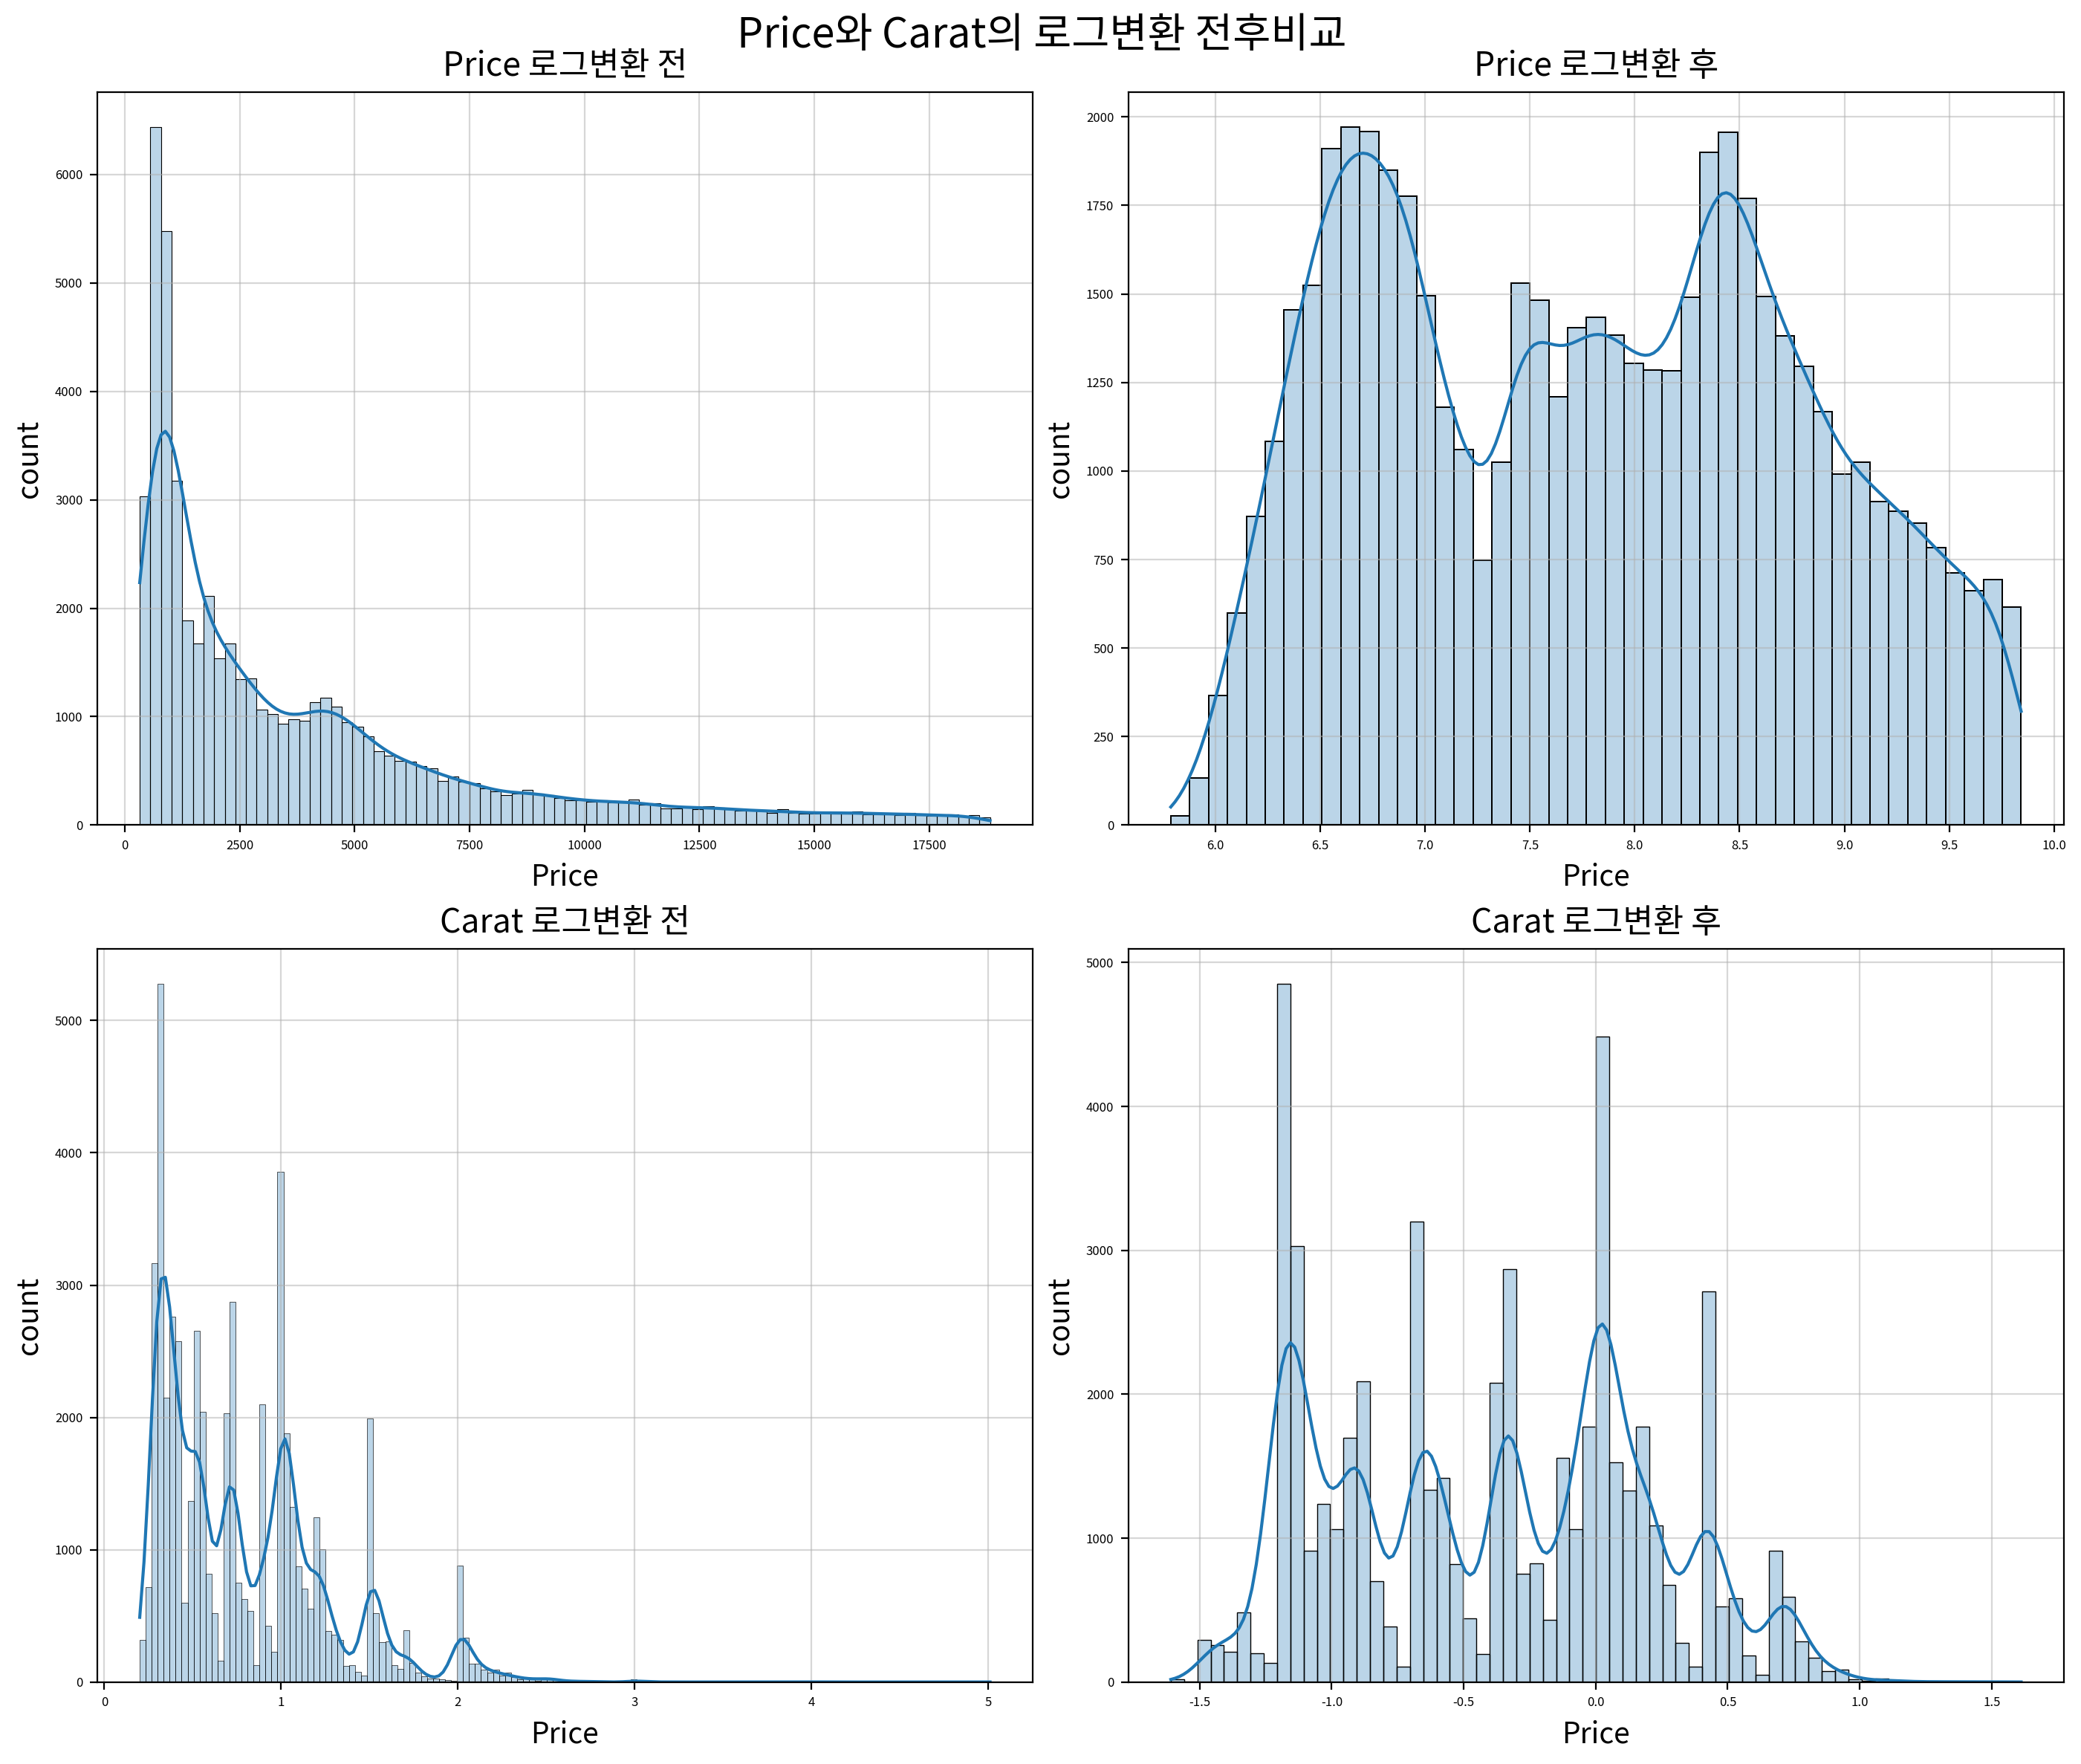

In [10]:
df['log_price'] = df['price'].map(np.log)
df['log_carat'] = df['carat'].map(np.log)
#df

# subplot 이용해서 분할그래프 만들기:
# 1) 그래프 초기화
width_px = 2800         # 그래프 가로 크기
height_px = 2400        # 그래프 세로 크기
rows = 2             # 그래프 행 수 ≠ 1
cols = 2             # 그래프 열 수 ≠ 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기
sb.histplot(data=df, ax=ax[0][0], x='price', kde=True, alpha=0.3)
sb.histplot(data=df, ax=ax[0][1], x='log_price', kde=True, alpha=0.3)
sb.histplot(data=df, ax=ax[1][0], x='carat', kde=True, alpha=0.3)
sb.histplot(data=df, ax=ax[1][1], x='log_carat', kde=True, alpha=0.3)

# 3) 그래프 꾸미기
# 전체 제목
fig.suptitle('Price와 Carat의 로그변환 전후비교', fontsize=20)
# 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# 첫 번째 영역 그래프의 제목, 글자크기, 색상, 격자
ax[0][0].set_title("Price 로그변환 전", fontsize=16, pad=8)
ax[0][0].grid(True, alpha=0.5)
ax[0][1].set_title("Price 로그변환 후", fontsize=16, pad=8)
ax[0][1].grid(True, alpha=0.5)
ax[0][0].set_xlabel("Price", labelpad = 5, fontsize = 14)
ax[0][0].set_ylabel("count", labelpad = 5, fontsize = 14)
ax[0][1].set_xlabel("Price", labelpad = 5, fontsize = 14)
ax[0][1].set_ylabel("count", labelpad = 5, fontsize = 14)

# 두 번째 영역 그래프의 x축 설정 및 x,y축 라벨 지정, 격자
ax[1][0].set_title("Carat 로그변환 전", fontsize=16, pad=8)
ax[1][0].grid(True, alpha=0.5)
ax[1][1].set_title("Carat 로그변환 후", fontsize=16, pad=8)
ax[1][1].grid(True, alpha=0.5)
ax[1][0].set_xlabel("Price", labelpad = 5, fontsize = 14)
ax[1][0].set_ylabel("count", labelpad = 5, fontsize = 14)
ax[1][1].set_xlabel("Price", labelpad = 5, fontsize = 14)
ax[1][1].set_ylabel("count", labelpad = 5, fontsize = 14)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료

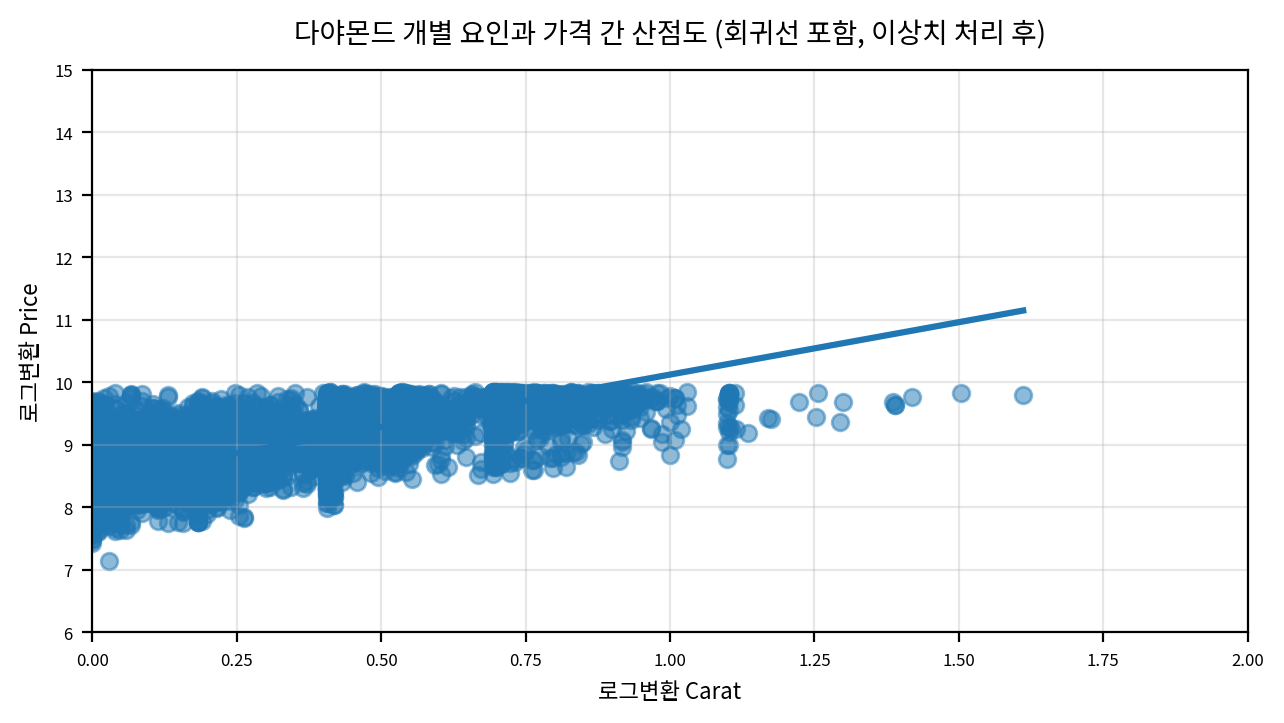

In [11]:
data = df[['log_price', 'log_carat']]  # 확인할 데이터 (컬럼단위)

# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 산점도 그래프(Reg Plot) 그리기 (회귀선 포함)
    # regplot()은 hue 파라미터를 지원 안한다 ㅠ
sb.regplot(data = data, x = 'log_carat', y = 'log_price',
        scatter_kws = {'alpha': 0.5})

# 3) 그래프 꾸미기: 
ax.set_title('다야몬드 개별 요인과 가격 간 산점도 (회귀선 포함, 이상치 처리 후)', fontsize=10, pad=10)
ax.set_xlabel('로그변환 Carat', fontsize=8)
ax.set_ylabel('로그변환 Price', fontsize=8)
ax.set_xlim([0, 2])
ax.set_ylim([6, 15])
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

> 로그변환의 효과: 특정 구간에 몰려있던 데이터의 분포를 고르게 해줌
> 
> -> 왜 써야 하는가는 `데이터분포에서의 정규성 위반에 대한 민감도를 줄이기 위함`과 관계에서의 `선형성 확보`이다.

## 미션 4. 명목형 변수(`cut, color, clarity`)별 가격 분포도 확인

> 시각화 그래프 what to use?
> 
> use: 독립변수 별로 kde plotting

====== cut 변수 ======
====== 범주 Ideal의 기초통계량 ======


,price
count,21551.000000
mean,3457.541970
std,3808.401172
min,326.000000
25%,878.000000
50%,1810.000000
75%,4678.500000
max,18806.000000


====== 범주 Premium의 기초통계량 ======


,price
count,13791.000000
mean,4584.257704
std,4349.204961
min,326.000000
25%,1046.000000
50%,3185.000000
75%,6296.000000
max,18823.000000


====== 범주 Good의 기초통계량 ======


,price
count,4906.000000
mean,3928.864452
std,3681.589584
min,327.000000
25%,1145.000000
50%,3050.500000
75%,5028.000000
max,18788.000000


====== 범주 Very Good의 기초통계량 ======


,price
count,12082.000000
mean,3981.759891
std,3935.862161
min,336.000000
25%,912.000000
50%,2648.000000
75%,5372.750000
max,18818.000000


====== 범주 Fair의 기초통계량 ======


,price
count,1610.000000
mean,4358.757764
std,3560.386612
min,337.000000
25%,2050.250000
50%,3282.000000
75%,5205.500000
max,18574.000000


====== color 변수 ======
====== 범주 E의 기초통계량 ======


,price
count,9797.000000
mean,3076.752475
std,3344.158685
min,326.000000
25%,882.000000
50%,1739.000000
75%,4003.000000
max,18731.000000


====== 범주 I의 기초통계량 ======


,price
count,5422.000000
mean,5091.874954
std,4722.387604
min,334.000000
25%,1120.500000
50%,3730.000000
75%,7201.750000
max,18823.000000


====== 범주 J의 기초통계량 ======


,price
count,2808.000000
mean,5323.818020
std,4438.187251
min,335.000000
25%,1860.500000
50%,4234.000000
75%,7695.000000
max,18710.000000


====== 범주 H의 기초통계량 ======


,price
count,8304.000000
mean,4486.669196
std,4215.944171
min,337.000000
25%,984.000000
50%,3460.000000
75%,5980.250000
max,18803.000000


====== 범주 F의 기초통계량 ======


,price
count,9542.000000
mean,3724.886397
std,3784.992007
min,342.000000
25%,982.000000
50%,2343.500000
75%,4868.250000
max,18791.000000


====== 범주 G의 기초통계량 ======


,price
count,11292.000000
mean,3999.135671
std,4051.102846
min,354.000000
25%,931.000000
50%,2242.000000
75%,6048.000000
max,18818.000000


====== 범주 D의 기초통계량 ======


,price
count,6775.000000
mean,3169.954096
std,3356.590935
min,357.000000
25%,911.000000
50%,1838.000000
75%,4213.500000
max,18693.000000


====== clarity 변수 ======
====== 범주 SI2의 기초통계량 ======


,price
count,9194.000000
mean,5063.028606
std,4260.458578
min,326.000000
25%,2264.000000
50%,4072.000000
75%,5777.250000
max,18804.000000


====== 범주 SI1의 기초통계량 ======


,price
count,13065.000000
mean,3996.001148
std,3799.483853
min,326.000000
25%,1089.000000
50%,2822.000000
75%,5250.000000
max,18818.000000


====== 범주 VS1의 기초통계량 ======


,price
count,8171.000000
mean,3839.455391
std,4011.747958
min,327.000000
25%,876.000000
50%,2005.000000
75%,6023.000000
max,18795.000000


====== 범주 VS2의 기초통계량 ======


,price
count,12258.000000
mean,3924.989395
std,4042.302816
min,334.000000
25%,900.000000
50%,2054.000000
75%,6023.750000
max,18823.000000


====== 범주 VVS2의 기초통계량 ======


,price
count,5066.000000
mean,3283.737071
std,3821.647537
min,336.000000
25%,794.250000
50%,1311.000000
75%,3638.250000
max,18768.000000


====== 범주 VVS1의 기초통계량 ======


,price
count,3655.000000
mean,2523.114637
std,3334.838888
min,336.000000
25%,816.000000
50%,1093.000000
75%,2379.000000
max,18777.000000


====== 범주 I1의 기초통계량 ======


,price
count,741.000000
mean,3924.168691
std,2806.778270
min,345.000000
25%,2080.000000
50%,3344.000000
75%,5161.000000
max,18531.000000


====== 범주 IF의 기초통계량 ======


,price
count,1790.000000
mean,2864.839106
std,3920.248499
min,369.000000
25%,895.000000
50%,1080.000000
75%,2388.500000
max,18806.000000


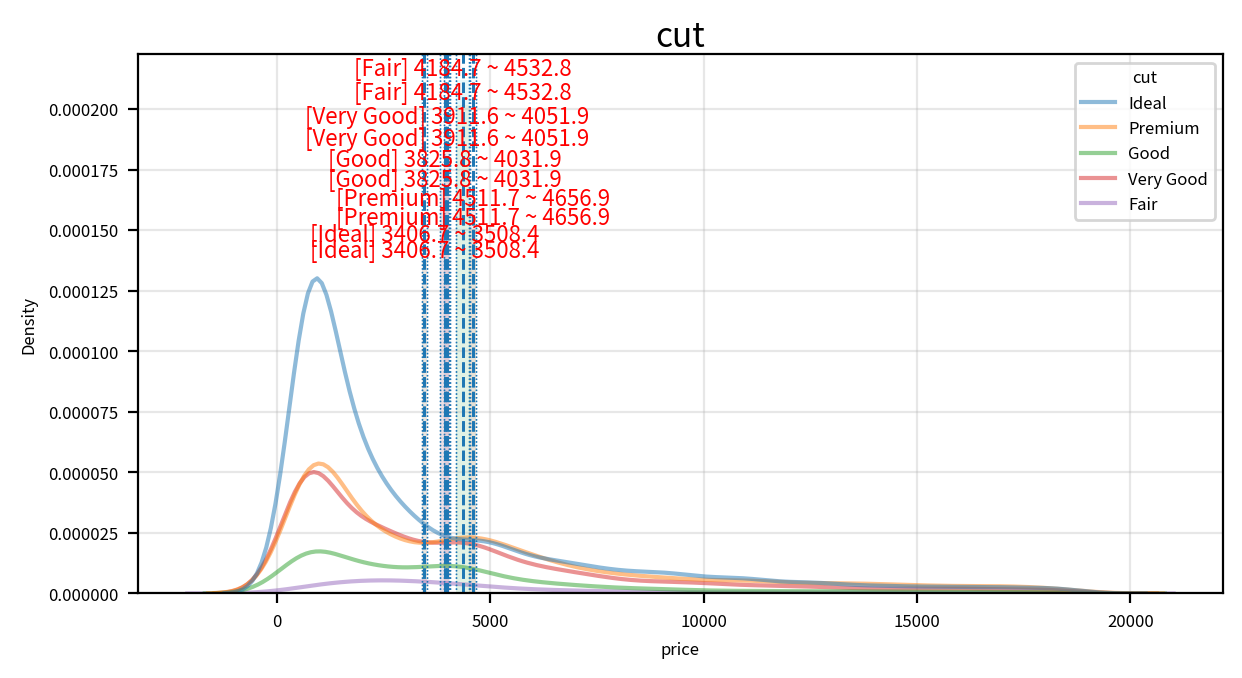

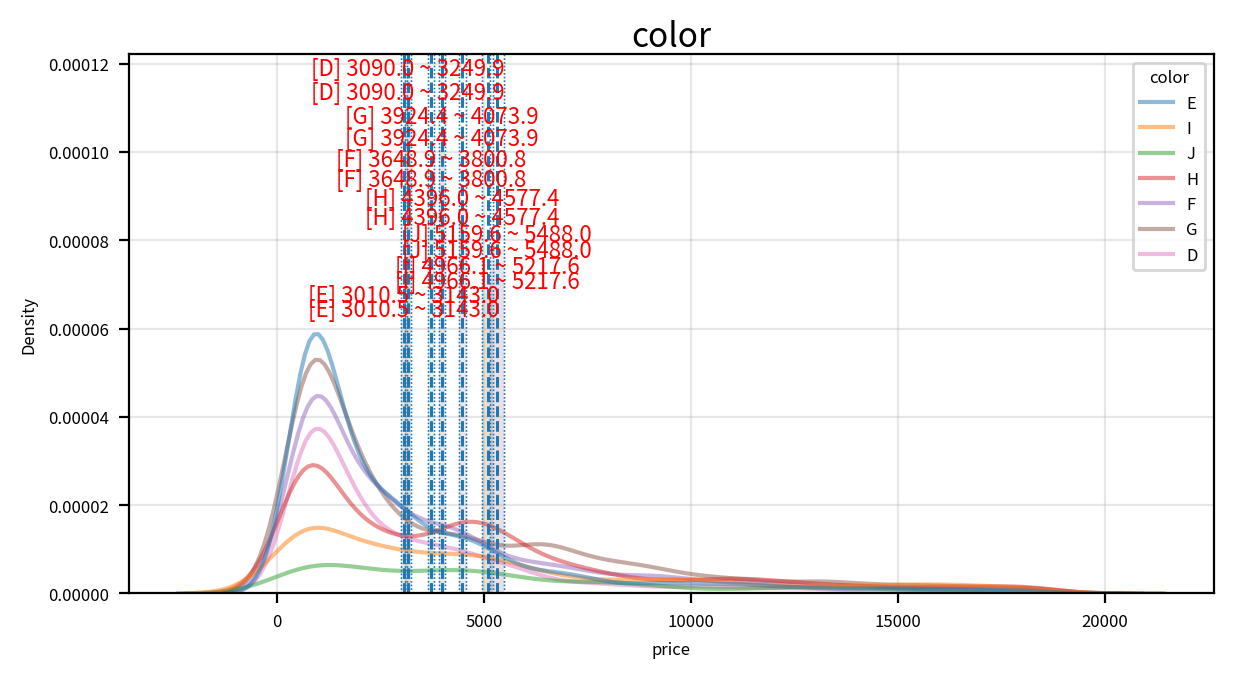

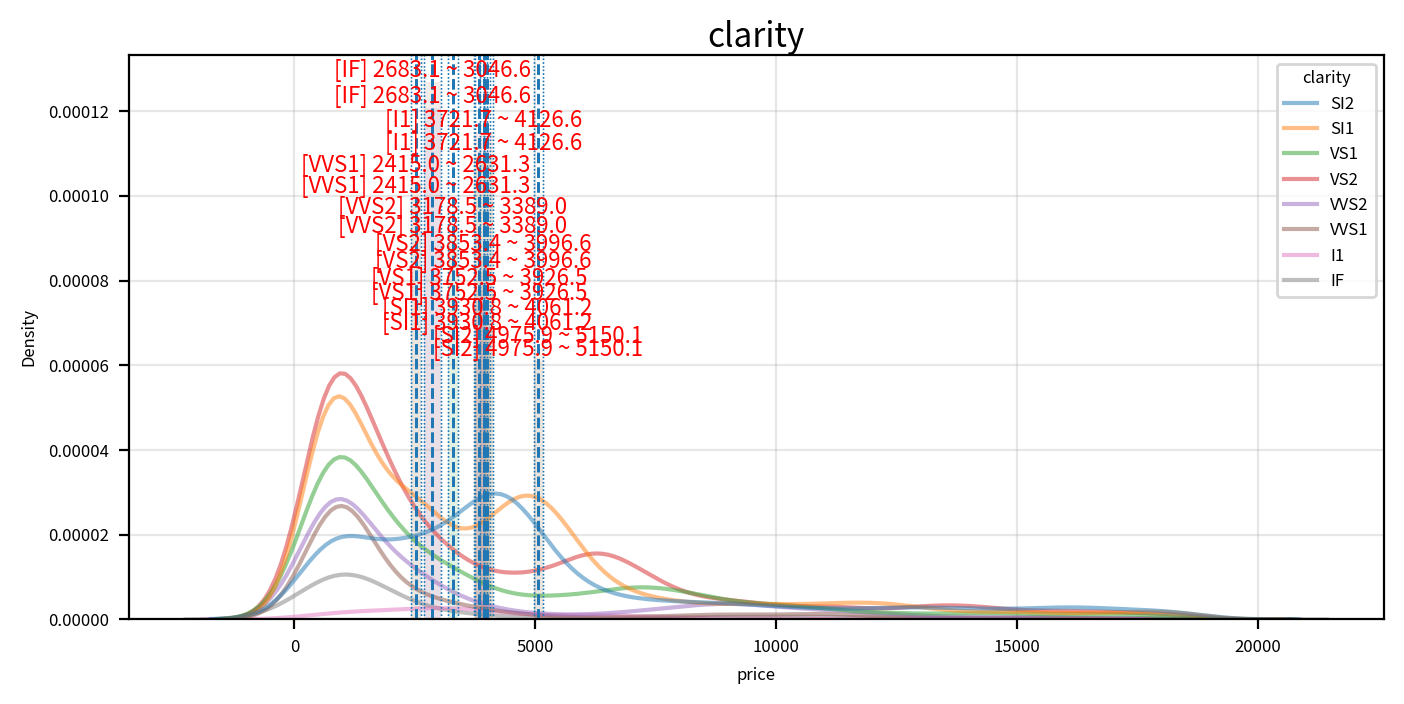

In [12]:
# 확인할 데이터 필드 (수치형):
field = 'price'
# 확인할 데이터 필드 (명목형):
nominal = ['cut', 'color', 'clarity']

for items in nominal:
    # 집단 구분용 필드 (범주형, hue):
    hue_field = items
    # 요일 종류: 
    hue_values = df[hue_field].unique()
    group_count = len(hue_values)

    # 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
    width_px = 1400             # 그래프 가로 크기
    height_px = 700          # 그래프 세로 크기
    rows = 1                    # 그래프 행 수
    cols = 1                    # 그래프 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

    temp = df[[field, items]]
    #display(temp)

    # 2) KDE plot 그리기:
    sb.kdeplot(data=temp, x=field, hue = hue_field, 
            alpha=0.5)
    ax.grid(True, alpha=0.3)
    ax.set_title(hue_field, fontsize=12, pad=3)

    print(f"====== {hue_field} 변수 ======")
    for i, v in enumerate(hue_values):
        temp_sub = temp[temp[hue_field] == v]
        print(f"====== 범주 {v}의 기초통계량 ======" )
        display(temp_sub.describe())

        # 신뢰구간용 기본변수:
        max = temp_sub[field].max()                        # 최대값
        dof = len(temp_sub[field]) - 1                     # 자유도
        clevel = 0.95                                  # 신뢰수준
        sp_mean = temp_sub[field].mean()                   # 표본평균
        sp_std = temp_sub[field].std(ddof=1) # default: ddof=1   # 표본표준편차
        sp_std_error = sp_std / sqrt(len(temp_sub[field])) # 표본표준오차

        cmin, cmax = t.interval(clevel, dof, loc = sp_mean, scale = sp_std_error)

        for values in temp_sub:
                ax.axvline(cmin, linestyle=":", linewidth=0.5) # cmin 경계선
                ax.axvline(cmax, linestyle=":", linewidth=0.5) # cmax 경계선

                # 신뢰구간 y값, 평균표시:
                ymin, ymax = ax.get_ylim()
                ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
                ax.axvline(sp_mean, linestyle='--', linewidth=1)

                # 텍스트 그리기 (statAnnotator 기능):
                ax.text(x = cmin + (cmax-cmin)/2,
                        y=ymax,
                        s="[%s] %0.1f ~ %0.1f" % (v, cmin, cmax),
                        horizontalalignment = "center",
                        verticalalignment = "bottom",
                        fontdict = {"size": 8, "color": "red"})

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

변수 당 범주에 따른 중앙값, 분산의 변동 추이:
- `cut`:
  - ( `범주 명(중앙값, 분산)` )
  - `Fair(3282.0, 3560.4)` → `Good(3050.5, 3681.6)` → `Very Good(3935.9, 2648.0)` → `Premium(3185.0, 4349.2)` → `Ideal(1810.0, 3808.4)` 

- `color`:
  - ( `범주 명(중앙값, 분산)` )
  - `J: worst(4234.0, 4438.2)` → `I(3730.0, 4722.4)` → `H(3460.0, 4215.9)` → `G(2242.0, 4051.1)` → `F(2343.5, 3785.0)` → `E(1739.0, 3344.2)` → `D: best(1838.0, 3356.6)`

- `clarity`:
  - ( `범주 명(중앙값, 분산)` )
  - `I1: worst(3344.0, 2806.8)` → `SI2(4072.0, 4260.5)` → `SI1(2822.0, 3799.5)` → `VS2(2054.0, 4042.3)` → `VS1(2005.0, 4011.7)` → `VVS2(1311.0, 3821.6)` → `VVS1(1093.0, 3334.8)` → `IF: best(1080.0, 3920.2)`

> 각 변수의 범주 당 `중앙값`의 변화로 판단 하였을 때, 세 명목형 변수 중 가격 차이의 경향성이 제일 뚜렷하게 나온 변수는 `clarity` 였다.
> 그리고 각 변수의 범주 당 `분산 및 분포도`의 겹침 정도로 판단 하였을 때, 세 명목형 변수 중 등급이 달라도 가격이 크게 겹치는 변수는 `color`이였다.

## 미션 5. 통계 검증 - Premium 컷 다이아몬드는 Ideal 컷보다 평균 가격이 높은지 

### 1. 가설 세우기:

> 가설: `cut`에서 제일 높은 등급인 `Ideal` 컷 다이아몬드의 평균 가격이 `Premium`컷 가격의 평균 보다 높을 것이다.

### 2. 어떤 검정방법이 적절한지 선택, 선택이유 서술:

> 1. 독립변수: 명목형 / 종속변수: 연속형
> 2. 기존 독립변수 당 범주 갯수: 
>   - `cut`: 5개 
>   - `color`: 7개 
>   - `clarity`: 8개
> 3. 이 중 `cut` 명목형 독립변수 1개에서 범주 2개: `Premium`, `Ideal` 당 `Price` 연속형 종속변수 1개의 평균 비교를 진행 예정
> 4. 이때, 독립변수의 범주 끼리는 서로 `독립` 관계이다.

> -> by 1 ~ 4: `One-way ANOVA` 분산분석을 시도해보고, 만약 데이터가 정규성 및 등분산성 둘 다를 충족할 시에는 `Bartlett` 검정을, 정규성만 만족할 시 에는 `Levene's` 검정을, 정규성과 등분산성 둘 다 만족하지 못할 시에는 `Kruskal-Wallis` 분산분석을 시도 할 예정이다. 

### 3. 실제 검정 수행해보기:

In [13]:
df2 = df[['price', 'cut']]

# hue 별 그룹 생성:
groups = [(name, grp['price']) for name, grp in df2.groupby('cut')]
# ↑: pivot table (리스트, 2차월 배열 같은) 만든거임 
    # grping 된 data들
    # ex) [(금, [a, b, c, ..]), (토, [m,n,o,..]), (일, [..])]

report = []
normal_dist = True

for name, series in groups:
    stat, p = normaltest(series)
    ok = p > 0.05
    report.append({
        "fields": name,
        "statistic": stat,
        "p-value": p,
        "result": ok
    })
    normal_dist = normal_dist and ok

# 등분산성 검정법 선택:
    # 정규성 충족할 때 등분산성 검정방법:
if normal_dist:
    test_name = "Bartlett"
    stat, p = bartlett(*[s.values for _, s in groups]) # 모든 컬럼의 데이터 한번에
# 정규성 충족 못할 때 등분산성 검정법:
else:
    test_name = "Levene's"
    stat, p = levene(*[s.values for _, s in groups], 
                        center='median')
    # : 정규성 충족 못할 땐 '기본값인 평균'으로 계산하면 안됨

equal_var = p > 0.05

report.append({
    "fields": test_name,
    "statistic": stat,
    "p-value": p,
    "result": equal_var
})

report_df = DataFrame(report).set_index('fields')
report_df

,statistic,p-value,result
fields,,,
Fair,542.090883,1.934017e-118,False
Good,1574.201934,0.000000e+00,False
Ideal,7266.460664,0.000000e+00,False
Premium,2756.931465,0.000000e+00,False
Very Good,3358.166603,0.000000e+00,False
Levene's,123.595294,3.360147e-105,False


### 4. 검정 결과 해석하기 (유의? / 의미있는 차이?):

- 통계량(statistic) 검사 결과, 컷 등급 `Ideal의 평균가격(≒ 7266.5)`이 `Premium의 평균 가격(≒ 2756.9)`보다 약 `4509.6` 정도 높게 나왔다. 
- 그러나 `Ideal의 평균가격`과 `Premium의 평균 가격` 검정 결과의 p-value값이 둘다 0.05가 넘게 나와 정규성을 충족 못하여 Levene's 검정으로 등분산성 충족 유무를 확인 해보았고, 등분산성도 충족 못함을 확인하였다.
- 따라서 평균 가격 비교는 통계적으로 유의미한 차이로 판단되지 않는다. 
  
## #06. 모든 컷은 서로 다를까

- 컷에 따른 가격차이 존재 유무 확인 by 분산분석
- if 차이 존재: 어떤 컷들 사이에서 발생하는지 사후검정
- 조건: `가격 서열표`처럼 정리하기

독립변수가 5개가 되었고 각 변수 간 서열이 있으니 `mapping`을 통해 순서를 숫자로 매핑처리 해야됨

그리고 명목형 변수가 3개 이상 부터는 `One-way ANOVA` 분산분석을 수행해야한다. 

In [14]:
from pandas import get_dummies, merge

df3 = get_dummies(df2, columns=['cut'], dtype='int')
# df3.head()

In [15]:
df3['cut_encoded'] = df2['cut'].map({
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    "Premium": 3,
    "Ideal": 4
})
df3.head()

,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,cut_encoded
0,326,0,0,1,0,0,4
1,326,0,0,0,1,0,3
2,327,0,1,0,0,0,1
3,334,0,0,0,1,0,3
4,335,0,1,0,0,0,1


In [16]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler

df4 = df3.copy()
df5 = df4.drop('cut_encoded', axis=1)
df5.head()

,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,326,0,0,1,0,0
1,326,0,0,0,1,0
2,327,0,1,0,0,0
3,334,0,0,0,1,0
4,335,0,1,0,0,0


In [17]:
x = df5[['price']]
#x.head()
scaler = MinMaxScaler()
df5['price_MinMaxed'] = scaler.fit_transform(x)
df5.head()

,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,price_MinMaxed
0,326,0,0,1,0,0,0.000000
1,326,0,0,0,1,0,0.000000
2,327,0,1,0,0,0,0.000054
3,334,0,0,0,1,0,0.000433
4,335,0,1,0,0,0,0.000487


In [18]:
# 기본 참조
from hossam import load_data
from pandas import DataFrame, melt
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from itertools import combinations
from math import sqrt

# 가정 확인을 위한 라이브러리:
from scipy.stats import t, normaltest, bartlett, levene

# 분산분석을 위한 라이브러리:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from pingouin import anova, welch_anova

# 선형회귀용 참조
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 사후검정용 참조
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, probplot, shapiro, anderson, kstest, pearsonr, spearmanr
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from pingouin import pairwise_tukey, pairwise_tests, pairwise_gameshowell

# VIF값 계산용 참조
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
skew_outlier = {}

for col in df5.columns:
    temp = df5[col].dropna()
    skew_original = temp.skew()
    z_scores = zscore(temp)
    outlier_count = int(np.sum(np.abs(z_scores) > 3))

    data_log = np.log1p(temp - temp.min() + 1)
    skew_log = data_log.skew()

    skew_outlier[col] = {
        'original_skew': skew_original,
        'log_skew': skew_log,
        'outliers(|z| > 3)': outlier_count
    }

skew_outlier_df5 = DataFrame(skew_outlier).T
skew_outlier_df5

,original_skew,log_skew,outliers(|z| > 3)
price,1.618395,-0.266927,1206.0
cut_Fair,5.525900,5.525900,1610.0
cut_Good,2.845207,2.845207,4906.0
cut_Ideal,0.410231,0.410231,0.0
cut_Premium,1.120184,1.120184,0.0
cut_Very Good,1.324097,1.324097,0.0
price_MinMaxed,1.618395,1.416972,1206.0


In [20]:
rows = []

for a, b in combinations(df5.columns, 2):
    x = df5[a]
    y = df5[b]

    # [1] 선형성 확인 (Ramsey RESET):
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    reset = linear_reset(model, power = 2, use_f = True)
    linearity_ok = reset.pvalue > 0.05

    # [2] 이상치 존재 여부(|z| > 3 기준):
    a_flag = skew_outlier_df5.loc[a, 'outliers(|z| > 3)'] > 0
    b_flag = skew_outlier_df5.loc[b, 'outliers(|z| > 3)'] > 0
    outlier_flag = a_flag or b_flag

    # [3] 상관계수 선택 및 계산:
    if linearity_ok and not outlier_flag:
        chosen = 'pearson'
        corr, pval = pearsonr(x, y)
    else:
        chosen = 'spearman'
        corr, pval = spearmanr(x, y)
    
    # [4] 유의성 판단 (p <= 0.05):
    significant = pval <= 0.05

    # [5] 상관강도 계산:
    abs_r = abs(corr)
    if abs_r >= 0.80:
        strength = "Very strong"
    elif abs_r >= 0.60:
        strength = "Strong"
    elif abs_r >= 0.40:
        strength = "Medium"
    elif abs_r >= 0.20:
        strength = "Weak"
    else:
        strength = "Very weak"
    
    # [6] 행 추가:
    rows.append({
        "var_a": a,
        "var_b": b,
        "linearity": linearity_ok,
        "outlier_flag": outlier_flag,
        "chosen": chosen,
        "corr": corr,
        "pval": pval,
        "significant": significant,
        "strength": strength
    })

summary_df = DataFrame(rows)
summary_df.head()

,var_a,var_b,linearity,outlier_flag,chosen,corr,pval,significant,strength
0,price,cut_Fair,False,True,spearman,0.054646,5.865650e-37,True,Very weak
1,price,cut_Good,False,True,spearman,0.017646,4.159158e-05,True,Very weak
2,price,cut_Ideal,False,True,spearman,-0.117449,5.964407e-165,True,Very weak
3,price,cut_Premium,False,True,spearman,0.094623,1.653694e-107,True,Very weak
4,price,cut_Very Good,False,True,spearman,0.004499,2.960657e-01,False,Very weak


### 컷 등급 전체를 놓고 가격 차이가 존재하는지 분산분석 수행 후 알 수 있는 사실:

- `cut`에 따른 가격 차이는 `Fair`, `Good`, `Ideal`, `Premium`에서 가격과의 상관정도는 약하지만, 그 차이가 유의미하다는 결론을 낼 수 있다. 

In [21]:
# 1) 등장하는 모든 변수 목록 추출:
vars = sorted(set(summary_df['var_a']).union(summary_df['var_b']))
             # ↑: 중복 제거하고 추출

# 2) 빈 상관행렬 생성 (NaN으로 초기화):
corr_matrix = DataFrame(np.nan, index=vars, columns=vars)

# 3) summary_df 내용을 반영하여 대칭행렬 채우기:
for _, row in summary_df.iterrows():
    a, b, r = row['var_a'], row['var_b'], row['corr']
    corr_matrix.loc[a, b] = r
    corr_matrix.loc[b, a] = r   # 대칭 

# 4) 대각선(diagonal)을 1로 설정:
np.fill_diagonal(corr_matrix.values, 1)

corr_matrix

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,price,price_MinMaxed
cut_Fair,1.000000,-0.055482,-0.143078,-0.102801,-0.094236,0.054646,0.054646
cut_Good,-0.055482,1.000000,-0.258018,-0.185385,-0.169940,0.017646,0.017646
cut_Ideal,-0.143078,-0.258018,1.000000,-0.478074,-0.438243,-0.117449,-0.117449
cut_Premium,-0.102801,-0.185385,-0.478074,1.000000,-0.314877,0.094623,0.094623
cut_Very Good,-0.094236,-0.169940,-0.438243,-0.314877,1.000000,0.004499,0.004499
price,0.054646,0.017646,-0.117449,0.094623,0.004499,1.000000,1.000000
price_MinMaxed,0.054646,0.017646,-0.117449,0.094623,0.004499,1.000000,1.000000


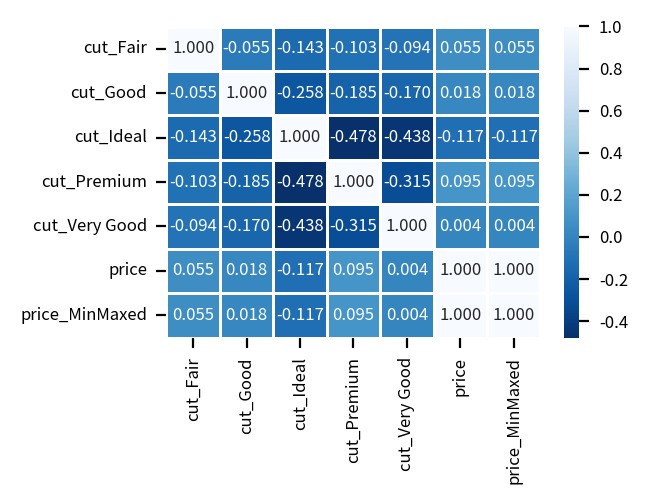

In [22]:
# 변수 2개일 때 상관행렬:
#corr_matrix = origin[[xname, yname]].corr(method=chosen)

# 1) 그래프 초기화
width_px = 650              # 그래프 가로크기
height_px = 500             # 그래프 세로크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) Heatmap 그리기: seaborn 사용
sb.heatmap(data = corr_matrix, annot=True, fmt='0.3f', 
           linewidth = 0.5, cmap = "Blues_r", 
           annot_kws = {'size': 6})
  # camp: 칼라맵 종류: 'Greys', 'Purples', 'Blues', 'Greens', 
  # 'Oranges', 'Reds' / 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 
  # 'RdPu', 'BuPu' / 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 
  # 'BuGn', 'YlGn' / 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 
  # 'RdBu', 'RdYlBu' / 'RdYlGn', 'Spectral', 'coolwarm', 
  # 'bwr', 'seismic' / 'berlin', 'managua', 'vanimo'


# 4) 출력
plt.tight_layout()         # 여백 제거
plt.show()                 # 그래프 화면 출력
plt.close()                # 그래프 작업 종료

> 시각화를 통한 `cut`에 따른 `price` 차이의 존재를 시각화 한 결과, 컷 등급들 중 `Premium` 등급에서 제일 큰 상관도를 보여주었다. 
> 
> 그러나 전반적으로 모든 컷 등급들에서 `price`와 10% 이상을 넘기는 상관도를 보여주지는 못했다. 

## #07. 모든 품질 요인들에서 서로 영향을 주고받는지

### `이원분산분석`을 통한 `cut`, `color`, `clarity` 세 요인의 가격에 미치는 영향 및 두 요인이 함께 작용할 때의 상호작용 효과 알아보기

### 1. 데이터 전처리:

In [26]:
data = df.copy()
df6 = data[['price', 'cut', 'color', 'clarity']]
df6['cut_encoded'] = df6['cut'].map({
    "Ideal": 0,
    "Premium": 1,
    'Very Good': 2,
    'Good': 3,
    'Fair': 4
})
df6['color_encoded'] = df6['color'].map({
    "E": 0,
    "I": 1,
    'J': 2,
    'H': 3,
    'F': 4,
    'G': 5,
    'D': 6
})
df6['clarity_encoded'] = df6['clarity'].map({
    "SI2": 0,
    "SI1": 1,
    'VS1': 2,
    'VS2': 3,
    'VVS2': 4,
    'VVS1': 5,
    'I1': 6,
    'IF': 7
})
df6.head()

#nominal = ['cut', 'color', 'clarity']


# df7 = df6.drop(nominal, axis=1, inplace=True)
#display(df7)
# df7 = df7.rename(columns= {
#    'cut_encoded': 'cut',
#    'color_encoded': 'color',
#    'clarity_encoded': 'clarity'
    
#})
# df7.head()

C:\Users\itwill\AppData\Local\Temp\ipykernel_20816\42376257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['cut_encoded'] = df6['cut'].map({
C:\Users\itwill\AppData\Local\Temp\ipykernel_20816\42376257.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['color_encoded'] = df6['color'].map({
C:\Users\itwill\AppData\Local\Temp\ipykernel_20816\42376257.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,price,cut,color,clarity,cut_encoded,color_encoded,clarity_encoded
0,326,Ideal,E,SI2,0,0,0
1,326,Premium,E,SI1,1,0,1
2,327,Good,E,VS1,3,0,2
3,334,Premium,I,VS2,1,1,3
4,335,Good,J,SI2,3,2,0


In [34]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 우선은 각각 개별 요인이 가격에 미치는 영향 보기:

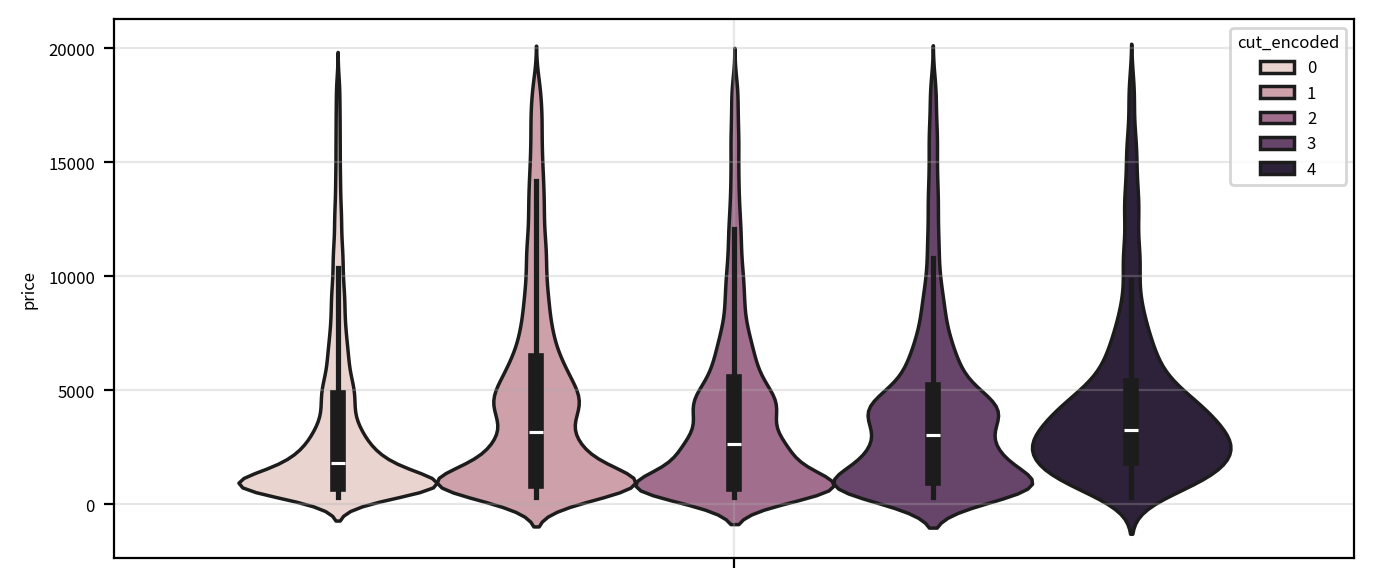

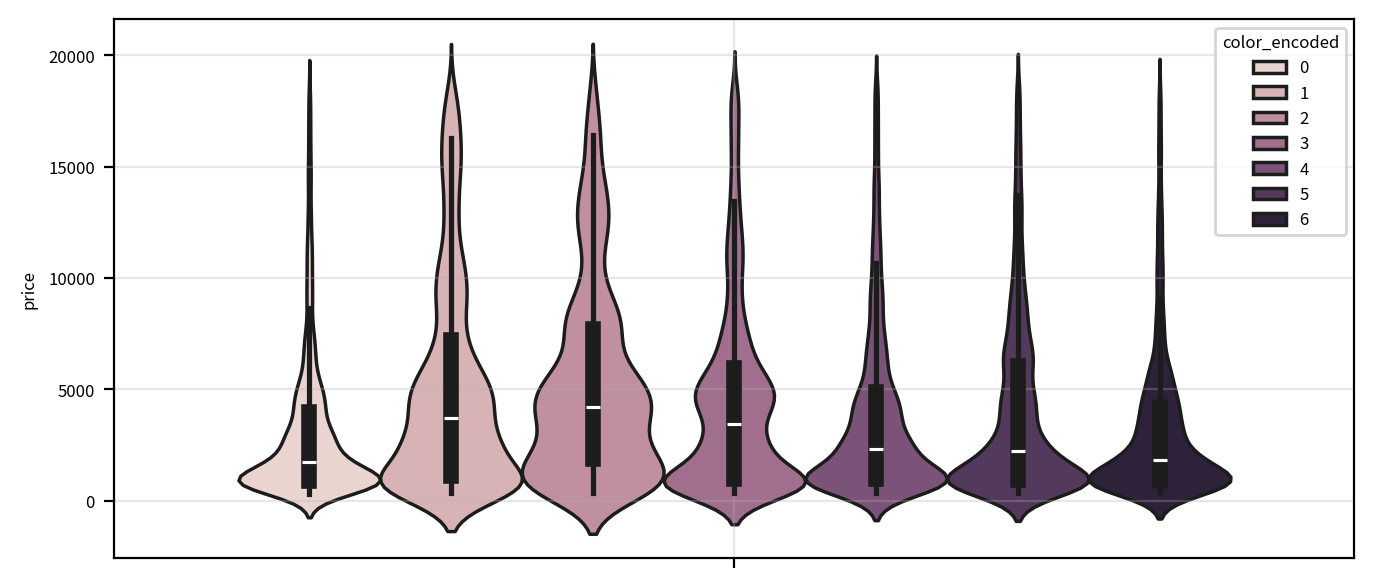

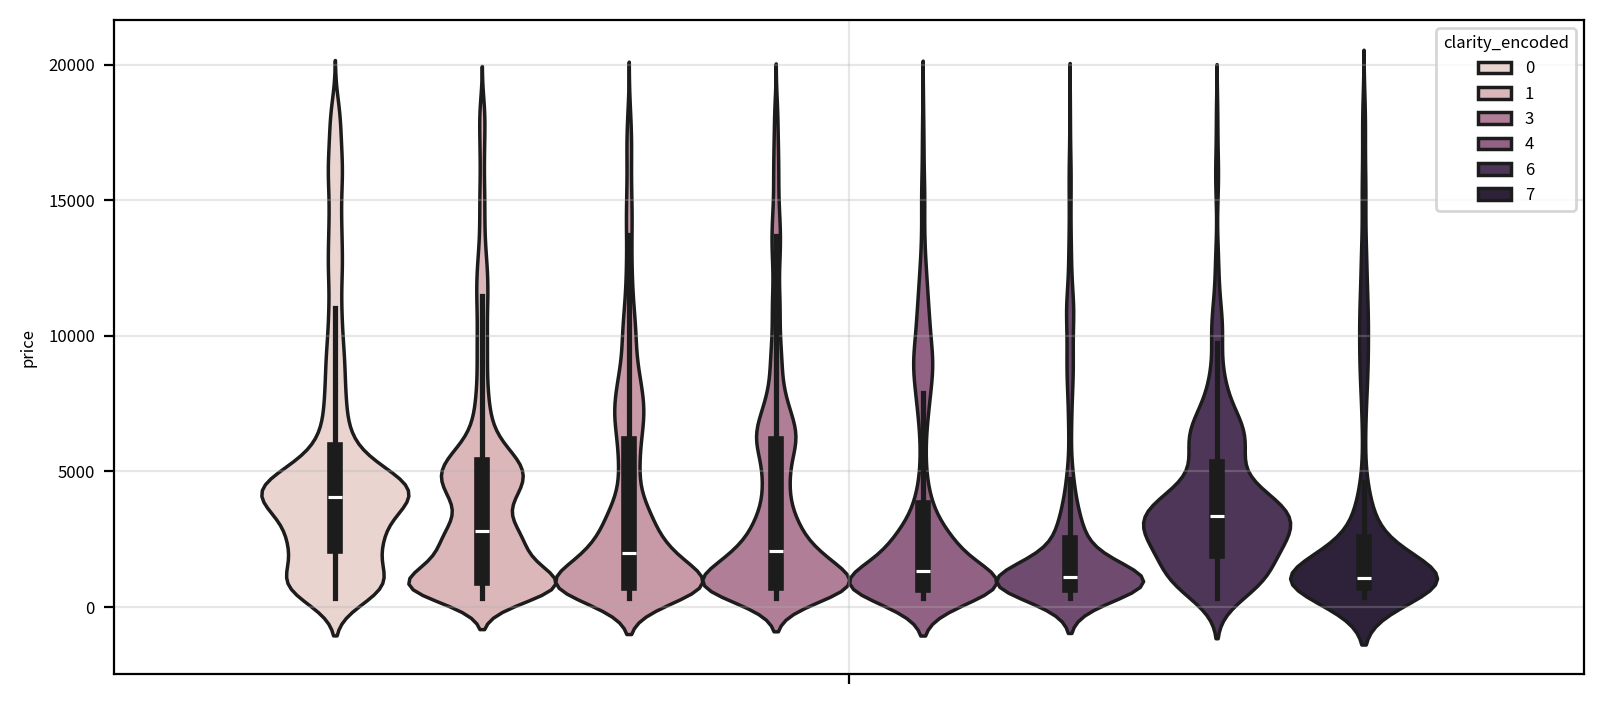

In [37]:
data = df6.copy()
xname = ['cut_encoded', 'color_encoded', 'clarity_encoded']  # 범주형 독립변수
yname = 'price'          # 수치형 종속변수 1개

for a in data[xname]:
#    print(a, b)
    # 확인할 데이터 필드 (수치형):
    field = 'price'
    # 범주형 필드1:
    group_field = a

    # 시각화 할 필드만 원본데이터에서 추출:
    data = df6[[field, group_field]]

    group_values = df6[group_field].unique()
    group_count = len(group_values)

    # 1) 그래프 초기화: 캔버스(fig), 도화지(ax) 준비
    rows = 1             # 그래프 행 수
    cols = 1                       # 그래프 열 수
    width_px = 1600 * cols         # 그래프 가로 크기
    height_px = 700 * rows         # 그래프 세로 크기
    figsize = (width_px / my_dpi, height_px / my_dpi)

    # ax 객체가 행, 열 수에 따라 리스트 됨:
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

    # 2) 그래프 그리기:
    sb.violinplot(data=data, y=field, hue=group_field)

    ax.grid(True, alpha=0.3)

# 4) 출력:
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

> `cut` 변수에서는 오히려 `Fair`로 컷등급이 낮아질 때 `price` 가격의 평균이 높아지는 추세를 보이고
>
> `color` 변수에서는 `J` 등급의 `price` 평균이 제일 높고, 이어서 `I`와 `H`등급 순으로 가격의 평균이 높음이 보여진다.
>
> `clarity` 변수는 `I1` 등급의 평균만 제외하고 보았을 때, 세 명목형 변수 중에서는 높은 등급일수록 가격이 높아지는 관계가 뚜렷하게 나왔다.

### 두 요인이 함께 작용할 떄의 효과:

In [38]:
data = df6.copy()
xname = ['cut_encoded', 'color_encoded', 'clarity_encoded']  # 범주형 독립변수
yname = 'price'          # 수치형 종속변수 1개

for a, b in combinations(data[xname], 2):
    #    display(a, b)
    u1 = data[a].unique() # 명목형변수1의 수준들 종류
    u2 = data[b].unique() # 명목형변수2의 수준들 종류
    equal_var_fields = []        # 충족한 등분산성 조건 저장용 
    normal_dist = True
    report = []

    for i in u1:
        for j in u2:
            filtered_data = data[(data[a] == i) & (data[b] == j)][yname]
            equal_var_fields.append(filtered_data)
            s, p = normaltest(filtered_data)

            normalize = p > 0.05
            report.append({
                "fields": "{0}, {1}".format(i, j),
                "statistic": s,
                "p-value": p,
                "result": normalize
            })
            normal_dist = normal_dist and normalize

# 등분산성 검정법 선택:
if normal_dist:
    n = "Bartlett" # : 정규성 충족할 때
    s, p = bartlett(*equal_var_fields) # 모든 컬럼의 데이터 한번에
else:
    n = "Levene's" # :정규성 충족 못할 때
    s, p = levene(*equal_var_fields, 
                        center='median')
    # : 정규성 충족 못할 땐 '기본값인 평균'으로 계산하면 안됨

equal_var = p > 0.05

report.append({
    "fields": n,
    "statistic": s,
    "p-value": p,
    "result": equal_var
})

report_df = DataFrame(report).set_index('fields')
report_df

,statistic,p-value,result
fields,,,
"0, 0",639.562031,1.320899e-139,False
"0, 1",979.345449,2.176897e-213,False
"0, 2",645.373938,7.224868e-141,False
"0, 3",1255.328536,2.563728e-273,False
"0, 4",433.310634,8.087074e-95,False
"0, 5",367.024850,2.002472e-80,False
"0, 6",32.096922,1.072117e-07,False
"0, 7",48.228424,3.367680e-11,False
"1, 0",110.925294,8.182358e-25,False


> 독립변수의 요인들 간 정규성 및 등분산성 모두 충족 안하네..ㅎ
>
> 그래도 두 독립변수 간 상호작용 유무 확인은 필요하다. ㄱㄱ

In [47]:
xname = ['cut_encoded', 'color_encoded', 'clarity_encoded']  # 범주형 독립변수
yname = 'price'          # 수치형 종속변수 1개

for a, b in combinations(df6[xname], 2):
    xNAME = [a, b]
    data = df6[xNAME + [yname]]
    display(data)
    
    if equal_var:
        pg_anova = anova(data=data, dv=yname, between=xNAME)
    else:
        pg_anova = welch_anova(data=data, dv=yname, between=xNAME)
#    display(pg_anova)
    
    for idx in pg_anova.index:
        row = pg_anova.iloc[idx]
        source = row['Source']
        p_val = row['p-unc']
    
        if p_val <= 0.05:
            print(f"→ {source}효과는 유의함. (대립가설 채택: p ≤ 0.05)")
        else:
            print(f"→ {source}효과는 유의하지 않음. (귀무가설 채택: p > 0.05)")

,cut_encoded,color_encoded,price
0,0,0,326
1,1,0,326
2,3,0,327
3,1,1,334
4,3,2,335
...,...,...,...
53935,0,6,2757
53936,3,6,2757
53937,2,6,2757
53938,1,3,2757


ValueError: Length of values (2) does not match length of index (1)